# 0. *Импорт библиотек*

In [2]:
# !pip install pygmo

In [28]:
import pygmo as pg
import numpy as np
import cv2
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt 
%matplotlib ipympl 


# 1. *Функция Матьяса с использованием pygmo*

$0.26 (x^2 + y^2) - 0.48  x y$

In [29]:
class f_mat:

  def fitness (self, x):
    return [0.26*(x[0]*x[0] +x[1]*x[1])-0.48*x[0]*x[1]]

  def get_bounds (self):
    return ([-10,-10],[10,10])

In [30]:
prob = pg.problem(f_mat())
print(prob) 

Problem name: <class '__main__.f_mat'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-10, -10]
	Upper bounds: [10, 10]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



In [31]:
algo = pg.algorithm(pg.bee_colony(gen = 40, limit = 50))
pop = pg.population(prob,100)
pop = algo.evolve(pop)
print(pop.champion_f) 
print(pop.champion_x) 

[1.03307242e-05]
[-0.00670928 -0.00044212]


# 2. *Функция трехгорбого верблюда с использованием pygmo*

$2x^2 -1.05 x^4 + (x^6)/6 + xy + y^2$

In [32]:
class f_3ver:

  def fitness (self, x):
    return [2*x[0]*x[0] -1.05 * x[0]**4 + (x[0]**6)/6 + x[0]*x[1] + x[1]*x[1]]

  def get_bounds (self):
    return ([-10,-10],[10,10])

In [33]:
prob = pg.problem(f_3ver())
print(prob) 

Problem name: <class '__main__.f_3ver'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-10, -10]
	Upper bounds: [10, 10]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



In [34]:
algo = pg.algorithm(pg.bee_colony(gen = 40, limit = 50))
pop = pg.population(prob,100)
pop = algo.evolve(pop)
print(pop.champion_f) 
print(pop.champion_x) 

[2.17708101e-06]
[-0.00110141  0.00031804]


# 3. *Вторая часть лабораторной*

Нахождение минимума в данном изображении 

In [35]:
image = cv2.imread("../input/image-1/Screenshot_1.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY )

In [36]:
class Image:
  def __init__(self, image: np.ndarray):
    self.image =image

  def fitness (self, x: np.ndarray) -> np.float64:
    return [self.image[int(x[0])][int(x[1])]]
    
  def get_bounds (self):
    return ([0,0], [self.image.shape[0]-1, self.image.shape[1]-1])

In [45]:
prob = pg.problem(Image(image))
print(prob) 
algo = pg.algorithm(pg.sea(gen = 800))
pop = pg.population(prob,100)
pop = algo.evolve(pop)
print(f'Найденное значение функции: {pop.champion_f}')
print(f'Значение найденной точки: {pop.champion_x}')

Problem name: <class '__main__.Image'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [0, 0]
	Upper bounds: [455, 330]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none

Найденное значение функции: [17.]
Значение найденной точки: [366.82760658 126.61234132]


In [43]:
def draw_f(x_min, x_max, y_min, y_max, population = None, image = None): 
  x = np.arange(x_min, x_max, 1) 
  y = np.arange(y_min, y_max, 1) 
  X, Y = np.meshgrid(x, y) 
   
  fig = plt.figure(figsize=(7, 4)) 
  ax_3d = Axes3D(fig, auto_add_to_figure=True) 
  ax_3d.plot_surface(X, Y, image, cmap='plasma', alpha=0.5) 
  ax_3d.scatter(population.champion_x[1], population.champion_x[0], population.champion_f[0], c='black') 
  plt.show()

In [44]:
draw_f(0, image.shape[1], 0, image.shape[0], population=pop, image=image)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  import sys


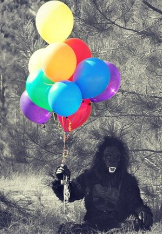

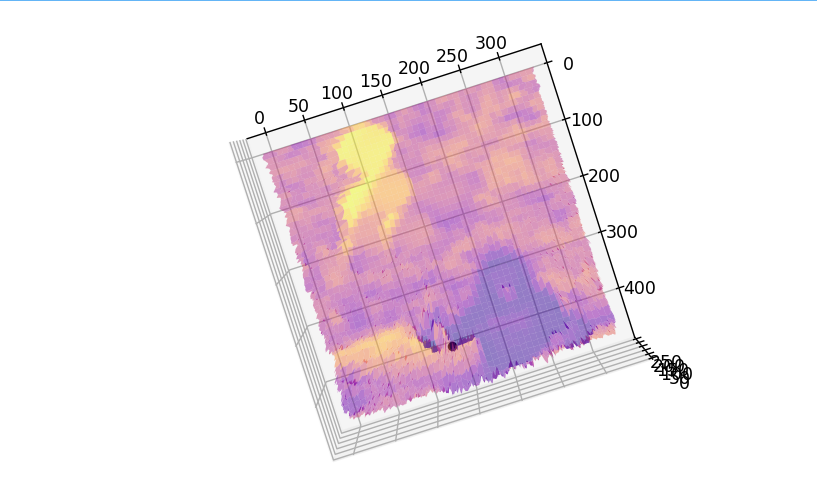

NameError: name 'population' is not defined